In [1]:
# 导入库
import pandas as pd
import numpy as np

In [2]:
trainSet = pd.read_csv("Training-set.csv")
trainSet.head()

,id,a,b,c,t,distance
0,0,5.343934,-3.793345,-5.849364,0,8.784200
1,1,-2.078382,0.795553,-3.898876,0,4.489300
2,2,-6.923646,1.368068,-3.871322,0,8.049572
3,3,-13.794147,4.336902,16.739670,1,22.120211
4,4,-5.175507,0.138892,1.171502,0,5.308256


In [3]:
testSet = pd.read_csv("Testing-set.csv")
testSet.head()

,id,a,b,c,distance,t
0,7000,-9.763325,-5.980476,-1.116588,11.503712,1
1,7001,5.717620,-4.977784,-9.168925,11.897003,0
2,7002,5.170640,-5.495420,-7.009920,10.299229,0
3,7003,-4.642903,-9.158488,-2.367180,10.537456,0
4,7004,8.303382,5.461795,1.792073,10.098955,0


In [4]:
# 查看每个种类有多少项实例
testSet["t"].value_counts()

1    525
0    475
Name: t, dtype: int64

In [5]:
x_train = np.array(trainSet[["a", "b", "c"]])
x_train[0:10]

array([[  5.34393442,  -3.79334507,  -5.84936405],
       [ -2.07838159,   0.79555251,  -3.8988764 ],
       [ -6.92364571,   1.36806794,  -3.87132155],
       [-13.79414689,   4.33690176,  16.73966994],
       [ -5.17550727,   0.13889184,   1.17150158],
       [ -2.52705424,  -8.46192975,   8.78905177],
       [ -8.12192239,  -1.25755102,   5.60437402],
       [  8.38061351,  -1.44151983,  -3.02848235],
       [ -1.59927128,  -4.55251467,   3.0050456 ],
       [-21.34622842,  18.42139246, -18.39413667]])

In [48]:
TrainSetOneHotLabel = pd.read_csv("TrainSetOneHotLabel.csv")
y_train = np.array(TrainSetOneHotLabel)
y_train[0:10]

array([[1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1]], dtype=int64)

In [7]:
testX = np.array(testSet[["a", "b", "c"]])
testX[0:5]

array([[-9.76332494, -5.98047647, -1.11658814],
       [ 5.7176201 , -4.97778351, -9.16892473],
       [ 5.17063988, -5.49541958, -7.00991964],
       [-4.64290272, -9.15848767, -2.36717971],
       [ 8.30338227,  5.46179545,  1.79207252]])

In [52]:
TestingOneHotlabel = pd.read_csv("TestingOneHotlabel.csv")
testY = np.array(TestingOneHotlabel)
testY[0:10]

array([[0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0]], dtype=int64)

In [9]:
np.argmax(testY[0:10], 1)

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [10]:
 from sklearn import tree

In [11]:
clf = tree.DecisionTreeClassifier()
clf.fit(trainSet[["a", "b", "c"]], trainSet["t"])
treePredict = clf.predict(testSet[["a", "b", "c"]])

In [12]:
sum(treePredict==testSet["t"])

762

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier(n_neighbors=1, p=2) 
knn.fit(trainSet[["a", "b", "c"]], trainSet["t"])
knnpredict = knn.predict(testSet[["a", "b", "c"]])

In [37]:
sum(knnpredict==testSet["t"])

772

In [49]:
x_up_train = trainSet.loc[trainSet["a"]>0][["a", "b", "c"]]
y_up_train = TrainSetOneHotLabel.loc[trainSet["a"]>0]

In [51]:
x_down_train = trainSet.loc[trainSet["a"]<=0][["a", "b", "c"]]
y_down_train = TrainSetOneHotLabel.loc[trainSet["a"]<=0]

In [53]:
x_up_test = testSet.loc[testSet["a"]>0][["a", "b", "c"]]
y_up_test = TestingOneHotlabel.loc[testSet["a"]>0]

In [54]:
x_down_test = testSet.loc[testSet["a"]<=0][["a", "b", "c"]]
y_down_test = TestingOneHotlabel.loc[testSet["a"]<=0]

In [58]:
print(np.shape(x_up_train), np.shape(y_up_train), np.shape(x_down_train), np.shape(y_down_train))
print(np.shape(x_up_test), np.shape(y_up_test), np.shape(x_down_test), np.shape(y_down_test))

(3462, 3) (3462, 2) (3538, 3) (3538, 2)
(509, 3) (509, 2) (491, 3) (491, 2)


In [38]:
import tensorflow as tf

In [62]:
xTrain = tf.placeholder(dtype=tf.float32, shape=[None, 3]);
yTrain = tf.placeholder(dtype=tf.float32, shape=[None, 2])

weight1 = tf.Variable(tf.random_normal([3, 33]))
biases1 = tf.Variable(tf.zeros([1, 33]) + 0.1)
weight2 = tf.Variable(tf.random_normal([33, 33]))
biases2 = tf.Variable(tf.zeros([1, 33]) + 0.1)
weight3 = tf.Variable(tf.random_normal([33, 33]))
biases3 = tf.Variable(tf.zeros([1, 33]) + 0.1)
weight4 = tf.Variable(tf.random_normal([33, 2]))
biases4 = tf.Variable(tf.zeros([1, 2]) + 0.1)

hidden1 = tf.matmul(xTrain, weight1) + biases1
hidden2 = tf.matmul(tf.nn.relu(hidden1), weight2) + biases2
hidden3 = tf.matmul(tf.nn.relu(hidden2), weight3) + biases3
output = tf.matmul(tf.nn.relu(hidden3), weight4) + biases4

predictions = tf.nn.softmax(output)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(yTrain * tf.log(tf.clip_by_value(predictions, 1e-10,1.0)), reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(0.001).minimize(cross_entropy)

correct_predictions = tf.equal(tf.argmax(predictions, 1), tf.argmax(yTrain, 1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [66]:
# batch_size = 10
Steps = 50000
lossup = []
# start = (i*batch_size)%1000
# end = min(start+batch_size, 1000)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(Steps):
        
        sess.run(train_step, feed_dict={ xTrain:x_up_train, yTrain:y_up_train})
        lossup.append(sess.run(cross_entropy, feed_dict={xTrain:x_down_train, yTrain:y_down_train}))
        
        if (i+1) % 500==0:
            total_cross_entropy = sess.run(cross_entropy, feed_dict={xTrain:x_up_train, yTrain:y_up_train})
            print('After %d training steps, cross entropy on all train data is %g' % (i, total_cross_entropy))
            total_train_accuracy = sess.run(accuracy, feed_dict={xTrain:x_up_train, yTrain:y_up_train})
            print('After %d training steps, accuracy on all train data is %g' % (i, total_train_accuracy))
            total_test_accuracy = sess.run(accuracy, feed_dict={xTrain:x_up_test, yTrain:y_up_test})
            print('After %d training steps, accuracy on all test data is %g' % (i, total_test_accuracy))

After 499 training steps, cross entropy on all train data is 0.443015
After 499 training steps, accuracy on all train data is 0.930676
After 499 training steps, accuracy on all test data is 0.56778
After 999 training steps, cross entropy on all train data is 0.231165
After 999 training steps, accuracy on all train data is 0.957828
After 999 training steps, accuracy on all test data is 0.605108
After 1499 training steps, cross entropy on all train data is 0.163212
After 1499 training steps, accuracy on all train data is 0.964183
After 1499 training steps, accuracy on all test data is 0.609037
After 1999 training steps, cross entropy on all train data is 0.136502
After 1999 training steps, accuracy on all train data is 0.973137
After 1999 training steps, accuracy on all test data is 0.644401
After 2499 training steps, cross entropy on all train data is 0.128072
After 2499 training steps, accuracy on all train data is 0.974581
After 2499 training steps, accuracy on all test data is 0.6522

After 20999 training steps, cross entropy on all train data is 0.0214083
After 20999 training steps, accuracy on all train data is 0.993068
After 20999 training steps, accuracy on all test data is 0.711198
After 21499 training steps, cross entropy on all train data is 0.0210246
After 21499 training steps, accuracy on all train data is 0.993356
After 21499 training steps, accuracy on all test data is 0.715128
After 21999 training steps, cross entropy on all train data is 0.0206081
After 21999 training steps, accuracy on all train data is 0.993645
After 21999 training steps, accuracy on all test data is 0.717092
After 22499 training steps, cross entropy on all train data is 0.0231435
After 22499 training steps, accuracy on all train data is 0.993068
After 22499 training steps, accuracy on all test data is 0.715128
After 22999 training steps, cross entropy on all train data is 0.0225243
After 22999 training steps, accuracy on all train data is 0.993068
After 22999 training steps, accuracy

After 40999 training steps, cross entropy on all train data is 0.0155249
After 40999 training steps, accuracy on all train data is 0.994512
After 40999 training steps, accuracy on all test data is 0.719057
After 41499 training steps, cross entropy on all train data is 0.0158233
After 41499 training steps, accuracy on all train data is 0.994801
After 41499 training steps, accuracy on all test data is 0.719057
After 41999 training steps, cross entropy on all train data is 0.015528
After 41999 training steps, accuracy on all train data is 0.994801
After 41999 training steps, accuracy on all test data is 0.713163
After 42499 training steps, cross entropy on all train data is 0.0153643
After 42499 training steps, accuracy on all train data is 0.994801
After 42499 training steps, accuracy on all test data is 0.717092
After 42999 training steps, cross entropy on all train data is 0.0151966
After 42999 training steps, accuracy on all train data is 0.994801
After 42999 training steps, accuracy 

In [67]:
# batch_size = 10
Steps = 50000
lossdown = []
# start = (i*batch_size)%1000
# end = min(start+batch_size, 1000)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(Steps):
        
        sess.run(train_step, feed_dict={ xTrain:x_down_train, yTrain:y_down_train})
        lossdown.append(sess.run(cross_entropy, feed_dict={xTrain:x_down_train, yTrain:y_down_train}))
        
        if (i+1) % 500==0:
            total_cross_entropy = sess.run(cross_entropy, feed_dict={xTrain:x_down_train, yTrain:y_down_train})
            print('After %d training steps, cross entropy on all train data is %g' % (i, total_cross_entropy))
            total_train_accuracy = sess.run(accuracy, feed_dict={xTrain:x_down_train, yTrain:y_down_train})
            print('After %d training steps, accuracy on all train data is %g' % (i, total_train_accuracy))
            total_test_accuracy = sess.run(accuracy, feed_dict={xTrain:x_down_test, yTrain:y_down_test})
            print('After %d training steps, accuracy on all test data is %g' % (i, total_test_accuracy))

After 499 training steps, cross entropy on all train data is 3.51754
After 499 training steps, accuracy on all train data is 0.817976
After 499 training steps, accuracy on all test data is 0.584521
After 999 training steps, cross entropy on all train data is 0.417077
After 999 training steps, accuracy on all train data is 0.955625
After 999 training steps, accuracy on all test data is 0.655804
After 1499 training steps, cross entropy on all train data is 0.380236
After 1499 training steps, accuracy on all train data is 0.959582
After 1499 training steps, accuracy on all test data is 0.663951
After 1999 training steps, cross entropy on all train data is 0.352819
After 1999 training steps, accuracy on all train data is 0.964104
After 1999 training steps, accuracy on all test data is 0.670061
After 2499 training steps, cross entropy on all train data is 0.343169
After 2499 training steps, accuracy on all train data is 0.966083
After 2499 training steps, accuracy on all test data is 0.6843

After 20999 training steps, cross entropy on all train data is 0.129285
After 20999 training steps, accuracy on all train data is 0.984172
After 20999 training steps, accuracy on all test data is 0.718941
After 21499 training steps, cross entropy on all train data is 0.125472
After 21499 training steps, accuracy on all train data is 0.985868
After 21499 training steps, accuracy on all test data is 0.731161
After 21999 training steps, cross entropy on all train data is 0.125472
After 21999 training steps, accuracy on all train data is 0.985585
After 21999 training steps, accuracy on all test data is 0.731161
After 22499 training steps, cross entropy on all train data is 0.125009
After 22499 training steps, accuracy on all train data is 0.985868
After 22499 training steps, accuracy on all test data is 0.731161
After 22999 training steps, cross entropy on all train data is 0.125027
After 22999 training steps, accuracy on all train data is 0.985585
After 22999 training steps, accuracy on a

After 40999 training steps, cross entropy on all train data is 0.0940507
After 40999 training steps, accuracy on all train data is 0.988412
After 40999 training steps, accuracy on all test data is 0.745418
After 41499 training steps, cross entropy on all train data is 0.0939016
After 41499 training steps, accuracy on all train data is 0.988694
After 41499 training steps, accuracy on all test data is 0.747454
After 41999 training steps, cross entropy on all train data is 0.093861
After 41999 training steps, accuracy on all train data is 0.988412
After 41999 training steps, accuracy on all test data is 0.745418
After 42499 training steps, cross entropy on all train data is 0.105694
After 42499 training steps, accuracy on all train data is 0.983607
After 42499 training steps, accuracy on all test data is 0.729124
After 42999 training steps, cross entropy on all train data is 0.0937497
After 42999 training steps, accuracy on all train data is 0.988694
After 42999 training steps, accuracy o

In [69]:
from matplotlib import pyplot as plt

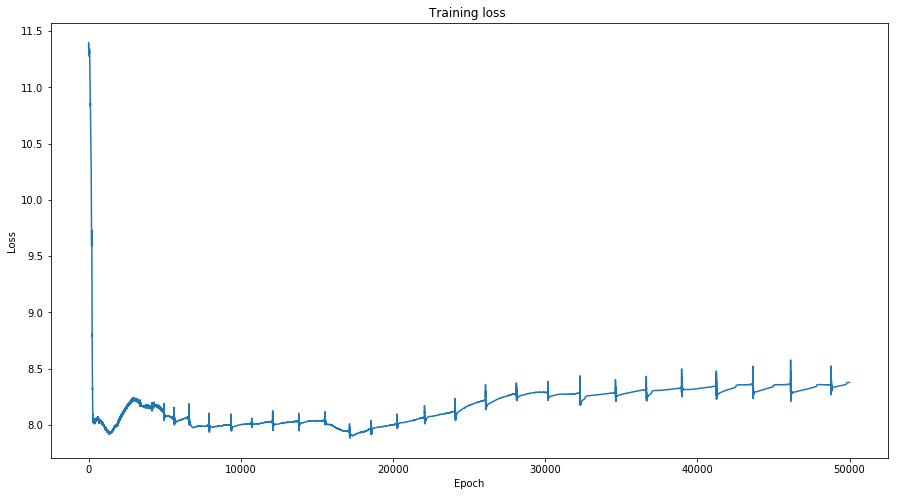

In [70]:
ax = plt.figure(figsize=(15,8))
plt.plot(range(len(lossup)),lossup)
plt.title('Training loss ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show(ax)

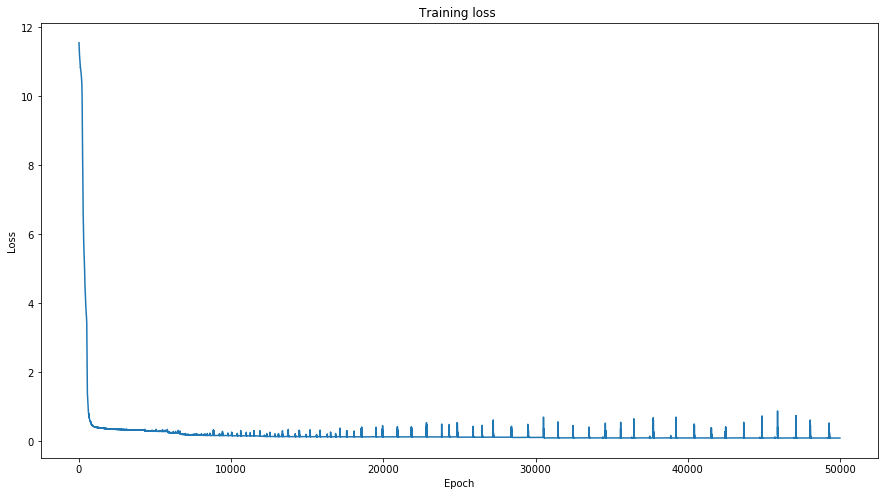

In [71]:
ax = plt.figure(figsize=(15,8))
plt.plot(range(len(lossdown)),lossdown)
plt.title('Training loss ')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show(ax)

In [16]:
testSet["distance"].describe()

count    1000.000000
mean       11.061524
std         0.575088
min        10.000377
25%        10.549865
50%        11.090504
75%        11.562022
max        11.995127
Name: distance, dtype: float64

In [17]:
trainSet["distance"].describe()

count    7000.000000
mean       14.306769
std         7.759768
min         0.687198
25%         8.357792
50%        11.068380
75%        21.150343
max        36.505566
Name: distance, dtype: float64

In [18]:
trainSet.loc[trainSet["t"]==0][["distance"]].describe()

,distance
count,3476.000000
mean,7.987758
std,2.177995
min,0.687198
25%,6.593829
50%,8.343216
75%,9.513436
max,11.995372


In [19]:
trainSet.loc[trainSet["t"]==1][["distance"]].describe()

,distance
count,3524.000000
mean,20.539710
std,6.057052
min,10.007508
25%,15.884379
50%,21.112254
75%,25.108676
max,36.505566


In [55]:
from sklearn import svm

In [107]:
svmC = svm.SVC(C=1.0, kernel='rbf')
# svmC = svm.SVC(kernel='poly')
svmC.fit(trainSet[["a", "b", "c"]], trainSet["t"])
svmTrainPredict = svmC.predict(trainSet[["a", "b", "c"]])
print(sum(svmTrainPredict==trainSet["t"]), sum(svmTrainPredict==trainSet["t"])/7000.0)

6766 0.966571428571


In [108]:
svmPredict = svmC.predict(testSet[["a", "b", "c"]])
sum(svmPredict==testSet["t"])

650

In [105]:
for number in range(100, 501, 20):
    svmC = svm.SVC(C=number, kernel='rbf', tol=0.0001)
    svmC.fit(trainSet[["a", "b", "c"]], trainSet["t"])
    svmTrainPredict = svmC.predict(trainSet[["a", "b", "c"]])
    svmPredict = svmC.predict(testSet[["a", "b", "c"]])
    print(number, sum(svmTrainPredict==trainSet["t"]), sum(svmTrainPredict==trainSet["t"])/7000.0, sum(svmPredict==testSet["t"]))

100 6995 0.999285714286 765
120 6996 0.999428571429 764
140 6997 0.999571428571 767
160 6998 0.999714285714 769
180 6998 0.999714285714 769
200 6998 0.999714285714 769
220 6998 0.999714285714 769
240 6998 0.999714285714 769
260 6998 0.999714285714 770
280 6998 0.999714285714 770
300 6998 0.999714285714 770
320 6998 0.999714285714 770
340 6998 0.999714285714 770
360 6998 0.999714285714 771
380 6998 0.999714285714 771
400 6998 0.999714285714 772
420 6998 0.999714285714 772
440 6998 0.999714285714 772
460 6999 0.999857142857 772
480 6999 0.999857142857 772
500 6999 0.999857142857 772


In [106]:
for number in range(5, 101, 5):
    svmC = svm.SVC(C=number, kernel='rbf', tol=0.0001)
    svmC.fit(trainSet[["a", "b", "c"]], trainSet["t"])
    svmTrainPredict = svmC.predict(trainSet[["a", "b", "c"]])
    svmPredict = svmC.predict(testSet[["a", "b", "c"]])
    print(number, sum(svmTrainPredict==trainSet["t"]), sum(svmTrainPredict==trainSet["t"])/7000.0, sum(svmPredict==testSet["t"]))

5 6884 0.983428571429 721
10 6930 0.99 736
15 6952 0.993142857143 748
20 6963 0.994714285714 751
25 6975 0.996428571429 762
30 6975 0.996428571429 760
35 6979 0.997 762
40 6982 0.997428571429 763
45 6985 0.997857142857 767
50 6988 0.998285714286 768
55 6988 0.998285714286 769
60 6989 0.998428571429 767
65 6991 0.998714285714 766
70 6993 0.999 767
75 6994 0.999142857143 767
80 6994 0.999142857143 768
85 6995 0.999285714286 768
90 6995 0.999285714286 768
95 6995 0.999285714286 766
100 6995 0.999285714286 765


In [31]:
# from sklearn.mixture import GMM
# gmm = GMM(n_components=4).fit(trainSet[["distance"]])
# labels = gmm.predict(testSet[["distance"]])

In [60]:
svmCC = svm.SVC(kernel='linear')
svmCC.fit(trainSet[["distance"]], trainSet["t"])
svmCCTrainPredict = svmCC.predict(trainSet[["distance"]])
sum(svmCCTrainPredict==trainSet["t"])

6502

In [61]:
svmCCTrainPredict = svmCC.predict(testSet[["distance"]])
sum(svmCCTrainPredict==testSet["t"])

505

In [73]:
List = [10, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12]
for number in List:
    print(sum((trainSet["distance"]>number) == (trainSet["t"]==1)))
    print(sum((testSet["distance"]>number) == (testSet["t"]==1)))
    print('************')

6524
525
************
6530
527
************
6542
529
************
6535
524
************
6531
516
************
6518
503
************
6503
501
************
6503
500
************
6503
502
************
6502
507
************
6506
503
************
6509
497
************
6512
503
************
6496
496
************
6502
496
************
6500
497
************
6484
488
************
6477
484
************
6479
484
************
6480
483
************
6476
475
************
